### Text Preprocessing
Text preprocessing includes a series of steps used to clean and prepare raw text data for analysis or modeling. It typically includes tasks such as removing noise (like HTML tags, URLs, punctuation, emojis, and emoticons), converting text to lowercase, correcting spelling, replacing abbreviations with full forms, removing stopwords, and normalizing words through stemming or lemmatization. 


In [1]:
# ! python3 -m pip install ipykernel


In [2]:
import pandas as pd

tweet_df = pd.read_csv('tweets.csv')
tweet_df = tweet_df.head(50)

In [3]:
tweet_df.drop(columns=['id', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'], inplace=True)

#### REPLACE SHORT FORM WORDS WITH FULL FORM

In [4]:
full_form_dict = {
    'KAG2020':'Keep America Great 2020'
}

def correct_short_forms(text):
 
    words = text.split()
    corrected_words = [full_form_dict.get(word, word) for word in words]
    corrected_text = ' '.join(corrected_words)
    
    return corrected_text

tweet_df['text'] = tweet_df['text'].apply(correct_short_forms)
tweet_df

,text
0,Republicans and Democrats have both created ou...
1,I was thrilled to be back in the Great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...
3,The Unsolicited Mail In Ballot Scam is a major...
4,RT @MZHemingway: Very friendly telling of even...
5,RT @WhiteHouse: President @realDonaldTrump ann...
6,Getting a little exercise this morning! https:...
7,https://t.co/4qwCKQOiOw
8,https://t.co/VlEu8yyovv
9,https://t.co/z5CRqHO8vg


#### LOWERCASING

In [5]:
tweet_df['text']=tweet_df['text'].str.lower()
tweet_df.head(5)

,text
0,republicans and democrats have both created ou...
1,i was thrilled to be back in the great city of...
2,rt @cbs_herridge: read: letter to surveillance...
3,the unsolicited mail in ballot scam is a major...
4,rt @mzhemingway: very friendly telling of even...


#### REMOVE HTML TAGS

In [6]:
import re

def remove_html_tags(text):
    pattern = re.compile(r'<.*?>') 
    return pattern.sub('', text)


In [7]:
tweet_df['text'] = tweet_df['text'].apply(lambda text: remove_html_tags(text))

In [8]:
tweet_df['text'][1]

'i was thrilled to be back in the great city of charlotte, north carolina with thousands of hardworking american patriots who love our country, cherish our values, respect our laws, and always put america first! thank you for a wonderful evening!! #kag2020 https://t.co/dnjzfrsl9y'

#### REMOVE URL

In [9]:
def remove_url(text):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return pattern.sub(r'',text)

tweet_df['text'] = tweet_df['text'].apply(remove_url)

In [10]:
tweet_df['text'][7]

''

#### REMOVE PUNCTUATION


In [11]:
import string

def remove_punctuation(text):
    pattern = re.compile(f"[{re.escape(string.punctuation)}]")
    return pattern.sub(r'',text)

tweet_df['text'] = tweet_df['text'].apply(remove_punctuation)
tweet_df.head()


,text
0,republicans and democrats have both created ou...
1,i was thrilled to be back in the great city of...
2,rt cbsherridge read letter to surveillance cou...
3,the unsolicited mail in ballot scam is a major...
4,rt mzhemingway very friendly telling of events...


#### SPELLING CORRECTION


In [12]:
from textblob import TextBlob

def correct_spelling(text):
    textBLB = TextBlob(text)
    return textBLB.correct().string

tweet_df['text'] = tweet_df['text'].apply(correct_spelling)


In [13]:
tweet_df['text'][14]

'thank you elise '

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')

nltk.download('stopwords')

from nltk.tokenize import word_tokenize,sent_tokenize



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### REMOVING STOPWORDS

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:

def removing_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_sentences = ' '.join(filtered_words)
    
    return filtered_sentences


tweet_df['text'] = tweet_df['text'].apply(removing_stopwords)
tweet_df.head(3)


,text
0,republicans democrats created economic problems
1,thrilled back great city charlotte north carol...
2,cbsherridge read letter surveillance court obt...


#### REMOVE EMOJI

In [18]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emojis
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
                               u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Arrows
                               u"\U0001F10D-\U0001F10F"  # Enclosed Alphanumeric Supplement
                               u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


tweet_df['text'] = tweet_df['text'].apply(remove_emojis)


In [19]:
tweet_df['text'][6]

'getting little exercise morning'

#### REMOVE EMOTICONS

In [20]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:3: SyntaxWarning: invalid escape sequence '\)'
<>:4: SyntaxWarning: invalid escape sequence '\]'
<>:5: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\)'
<>:11: SyntaxWarning: invalid escape sequence '\)'
<>:12: SyntaxWarning: invalid escape sequence '\}'
<>:13: SyntaxWarning: invalid escape sequence '\}'
<>:14: SyntaxWarning: invalid escape sequence '\)'
<>:15: SyntaxWarning: invalid escape sequence '\)'
<>:16: SyntaxWarning: invalid escape sequence '\^'
<>:17: SyntaxWarning: invalid escape sequence '\]'
<>:18: SyntaxWarning: invalid escape sequence '\)'
<>:27: SyntaxWarning: invalid escape sequence '\^'
<>:28: SyntaxWarning: invalid escape sequence '\)'
<>:29: SyntaxWarning: invalid escape sequence '\('
<>:30: SyntaxWarning: invalid escape sequence '\('
<>:31: SyntaxWarning: invalid escape sequence '\('
<>:36: SyntaxWarning: invalid escape sequence '\['
<>:37: SyntaxWarning: invalid escap

In [21]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

tweet_df['text'] = tweet_df['text'].apply(remove_emoticons)


In [22]:

print(tweet_df.iloc[9]['text'])

#### TOKENIZATION - There are many ways to implement tokenization.

In [23]:
normal_text = "republicans democrats created economic problems."
normal_para = "Trump won this debate, handily. Biden wasn’t a force at all. Trump was substantive, on-point, well-tempered."

##### Using the split function 

In [24]:
# work tokenization
tokenize1 = normal_text.split()
tokenize1

['republicans', 'democrats', 'created', 'economic', 'problems.']

In [25]:
# sentence tokenization
tokenize2 = normal_para.split(".")
tokenize2

['Trump won this debate, handily',
 ' Biden wasn’t a force at all',
 ' Trump was substantive, on-point, well-tempered',
 '']

##### Using regular expression

In [26]:
import re
tokenize3 = re.findall("[\w']+",normal_text)
tokenize3

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\LEGION\AppData\Local\Temp\ipykernel_29584\3088199826.py:2: SyntaxWarning: invalid escape sequence '\w'
  tokenize3 = re.findall("[\w']+",normal_text)


['republicans', 'democrats', 'created', 'economic', 'problems']

### Using NLTK

In [27]:
from nltk.tokenize import word_tokenize,sent_tokenize


In [28]:
word_tokenize(normal_text)

['republicans', 'democrats', 'created', 'economic', 'problems', '.']

In [29]:
sent_tokenize(normal_para)

['Trump won this debate, handily.',
 'Biden wasn’t a force at all.',
 'Trump was substantive, on-point, well-tempered.']

### USING SPACY

In [30]:
# !python -m spacy download en_core_web_sm

In [31]:
import spacy
nlp = spacy.load('en_core_web_sm')
tokenize4 = nlp(normal_text)
tokenize4

republicans democrats created economic problems.

In [32]:
for token in tokenize4:
    print(token)

republicans
democrats
created
economic
problems
.


In [33]:
def spacy_tokenize(text):
    nlp = spacy.load('en_core_web_sm')
    tokenize_value = nlp(text)
    return tokenize_value

tweet_df['text'] = tweet_df['text'].apply(spacy_tokenize)


In [34]:
tweet_df.head(3)

,text
0,"(republicans, democrats, created, economic, pr..."
1,"(thrilled, back, great, city, charlotte, north..."
2,"(cbsherridge, read, letter, surveillance, cour..."


### STEMMING

Stemming is the process of reducint inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language.

Here we again pass the tokenize value over stemming and then with the list comprehension  created the list of word and join then to show again in the dataframe.

Trying to install the spacy medium model

In [63]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 326.8 kB/s eta 0:02:11
     --------------------------------------- 0.1/42.8 MB 363.1 kB/s eta 0:01:58
     --------------------------------------- 0.1/42.8 MB 476.3 kB/s eta 0:01:30
     --------------------------------------- 0.1/42.8 MB 476.3 kB/s eta 0:01:30
     --------------------------------------- 0.1/42.8 MB 476.3 kB/s eta 0:01:30
     --------------------------------------- 0.2/42.8 MB 655.1 kB/s eta 0:01:05
     --------------------------------------- 0.2/42.8 MB 655.1 kB/s eta 0:01:05
     --------------------------------------- 0.2/42.8 MB 655.1 kB/s eta 0:01:05
     --------------------------------------- 0.3/42.8 MB 805.1 kB/s eta 0:00:53
     --------------------------------------- 0.3/42.8 MB 805.1 k


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_md')

def apply_stemming(text):
    
    tokenize_value = nlp(text)
    
    stemmed_words =  [stemmer.stem(token.text) for token in tokenize_value]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

tweet_df['text'] = tweet_df['text'].apply(apply_stemming)


In [36]:
tweet_df.head(3)

,text
0,republican democrat creat econom problem
1,thrill back great citi charlott north carolina...
2,cbsherridg read letter surveil court obtain cu...


### Lemmatization

Lemmatization, unlike Stemming , Reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word in scalled Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citatio nform of s set of words.

So the final outcome after all these text-pre-processing is:

In [65]:
pd.set_option('display.max_colwidth', None)
tweet_df

,text
0,republican democrat creat econom problem
1,thrill back great citi charlott north carolina thousand hardwork american patriot love countri cherish valu respect law alway put america first thank wonder even kag2020
2,cbsherridg read letter surveil court obtain cub news question disciplinari action who …
3,unsolicit mail ballot scar major threat democraci amp democrat know almost recent elect use system even though much smaller amp far fewer ballot count end disast larg number miss ballot amp fraud
4,mzhemingway friendli tell event come appar leak complaint media read articl the …
5,whiteh presid realdonaldtrump announc histor step protect constitut right pray public school http …
6,get littl exerci morn
7,
8,
9,


#### This Data seems to be quite GOOD ENOUGH for further tasks like (Indexing, Embedding ).

Zipf's Law

In [66]:
import re
import math 
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

In [67]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
text="""Elizabeth said Elizabeth always herself could could mind friend.
House sister young agreed purpose turn sure.
Wished meet minutes seemed friend distance music.
Quickly proposed turned ever girl suppose seldom.
Immediately herself delight time afford read sisters.
"""

stop_words= set(stopwords.words('english'))
tokens = re.findall(r'\b\w+\b', text.lower())
tokens = [t for t in tokens if t not in stop_words and len(t) > 2]


Zipf's Law

In [69]:
freq = Counter(tokens)
sorted_items = sorted(freq.items(), key=lambda x: x[1], reverse=True)#-->[(,),(,)]
words, freqs = zip(*sorted_items) 
ranks = range(1, len(freqs) + 1)


Heap's Law

In [70]:
vocab = set()
vocab_size = []
token_counts = []

for i, word in enumerate(tokens, 1):
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_counts.append(i)

Ploting

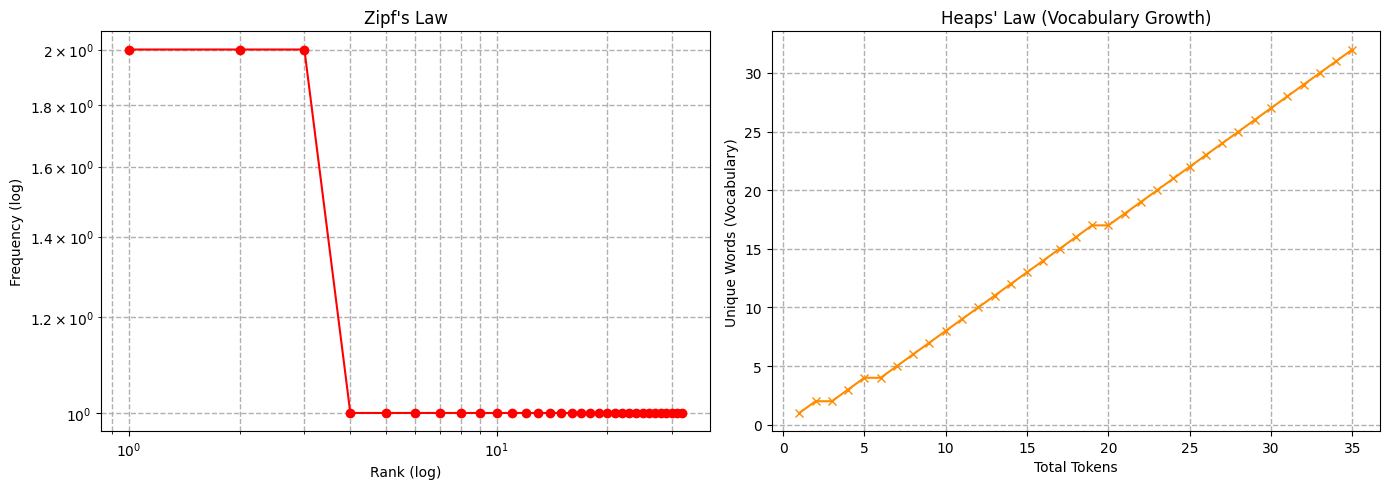

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Zipf’s Law Plot
axs[0].loglog(ranks, freqs, marker='o', color='red')
axs[0].set_title("Zipf's Law")
axs[0].set_xlabel("Rank (log)")
axs[0].set_ylabel("Frequency (log)")
axs[0].grid(True, which='both', linestyle='--', linewidth=1)

# Heaps’ Law Plot
axs[1].plot(token_counts, vocab_size, marker='x', color='darkorange')
axs[1].set_title("Heaps' Law (Vocabulary Growth)")
axs[1].set_xlabel("Total Tokens")
axs[1].set_ylabel("Unique Words (Vocabulary)")
axs[1].grid(True, linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

**TF-IDF**

SPliting the texts into paragraphs

In [ ]:
text = """I always wanted to create my own language. The farthest I got was just shuffling alphabets to new sounds in the Roman script and calling it a new language. When I got older, I got to study how intelligent people actually create artificial language. Linguist David Peterson created the Dothraki language for the world-famous show Game of Thrones. He did a very intelligent thing while creating that language. As, Dothraki culture is horse-based culture so to ask someone “How are you doing ?” in the Dothraki language, you have to ask “How are you riding ?” Similar instances can be found in all the natural languages. In all of the north north-Indian Sanskrit-derived languages, evening can be called saanj but there is another beautiful word which is less used nowadays. That word for the evening is “godhulibela”. go(gau) = cow. dhuli = dust. Bela = time. All the cattle returned home in the evening. Thus, the roads were dusty due to cattle movements. Vedic/Sanskrit/Indian civilization was very much cattle based so we have words like this. The point of all this is to show that the vocabulary of a language is not mere sounds, they are entrenched memories of a civilization.

There are few things so entrenched in our Nepalese civilization as Casteism or the Vedic Chaturvarna system. The terai regions of Nepal were parts of mainstream Indian Mahajanpadas so it is natural for us to assume that there was influence of the Vedic caste system since the inception of the system. Finally, since the great eastward migration of Khas/Arya (Pahadi) people, the caste system has been an ironclad law in the regions of present-day Nepal. If we look a little closer, we can see the effects of that system on every aspect of our lives.

The first insight I will take from is the person who taught me the first words. I still remember the words that my mother taught me. Most of them are good words, civilized words, but as a person, it is very difficult to remain calm, composed, and civilized all the time. The good thing about her was even when she was angry, she used civilized curse words. By, civilized curse words I mean curse words that are not CURSE words. She would use three specific curse words. ‘Kukur’ , ‘Alakchhini’ and ‘Chamar’ . I understood the first two words from an early age, ‘Kukur’ means dog, and ‘Alakchhini’ means unlucky or unprosperous but it took me some time to understand what chamar meant. It is a Dalit surname. They were the people involved in the leather (chamro)-tanning or shoe-making business. It is not my mother who thought she should start using that surname as a curse. It is generationally passed down information to use that name as a curse.

The second insight is funnier. There are two games very popular with children. The first is hide and seek, and the second is touch and run. The rules for touch and run are simple. One player is assigned a den and when that person can touch another player, the other person becomes a den and the game continues. The interesting thing about that game is that it’s called ChuiDum(‘Chui’ means touch, and the meaning of ‘Dum’ is in the following sentence) in Nepalese. Slowly, people are calling it ChuneChor(‘Chune’ means touch and ‘chor’ means thief) but still, the older word prevails. Dum is an umbrella term used to denote Dalit people in various parts of Nepal. The question is why the children feel compelled to use a derogatory term in their games and I came up with a hypothesis. I understood there is very dark sarcasm at play here. The parents or the society have taught the children that the Dalit people are called Dum and they must not touch them or get touched by them. Their peers have taught them that, in this game, you cannot get touched by that person or touch them. I think a child’s brain always correlates. If a child is not allowed to touch anyone in a certain scenario, the child feels comfortable relating to the other scenario where people cannot touch him/her in real life.

The third insight is so common, that I guarantee to the reader that they have used it in the past month at least once. When something gets ruined by someone we say “bhandyo”. When chaos ensues and we feel out of order we say “bhandbhailo”. In both these words, the root word is “bhand”. The etymology enthusiast inside me wanted the meaning of the root word. The meaning of that word thoroughly shocked me. Bhānds are the traditional folk entertainers of India, Pakistan, Bangladesh, and Nepal. In India and Nepal, the Bhānds are now an endogamous Hindu and Muslim community, which is no longer involved in their traditional occupation of folk entertainment. They include actors, dancers, minstrels, storytellers, and impressionists. While there was no TV or internet, they were the sources of entertainment in the hills of Nepal. It is said that the arrival of Bhānds was of great interest to the young men at that time. As the young men lacked female friendship, they were easily seduced by the dancing Bhānd women which gave them the entire wealth of their households resulting in the ruin of domestic order. Thus, “ghar bhandnu”(destroy household) , “bhandbhailo”(chaos) , “bhaduli”(woman who breaks homes) . It doesn’t take a genius to understand that these stereotypes and prejudices were made by the privileged class of the society on the nomadic dancer community cherry-picking certain cases. The stereotypes of certain communities have attached themselves to the vocabulary of the national language of Nepal.

Now, restricting vocabulary sounds very “woke” to me too but I always wanted to do a comparative study. In America, the word “nigger” is a restrictive word. The word in itself is not offensive but the context around it makes it offensive. The context is slavery. In other countries, the word is freely used. There are two countries in Africa named Niger and Nigeria but to the black community of America, the word is offensive due to historical concept although the word is mostly used today as slang by young adults to describe a peer or a friend. Now, compare them to Nepal, where the name of Bhand is literally used to describe chaos or ruin or the bringer of chaos or ruin. I am not “woke” but I think for a Bhānd(person), it would be difficult to use the word Bhadnu(word describing destruction).

The thing that troubles me the most is that there is no discourse around it."""


# Split into paragraphs
documents = [p.strip() for p in text.split('\n\n') if p.strip()]

for each_doc in documents:
    print(each_doc)

I always wanted to create my own language. The farthest I got was just shuffling alphabets to new sounds in the Roman script and calling it a new language. When I got older, I got to study how intelligent people actually create artificial language. Linguist David Peterson created the Dothraki language for the world-famous show Game of Thrones. He did a very intelligent thing while creating that language. As, Dothraki culture is horse-based culture so to ask someone “How are you doing ?” in the Dothraki language, you have to ask “How are you riding ?” Similar instances can be found in all the natural languages. In all of the north north-Indian Sanskrit-derived languages, evening can be called saanj but there is another beautiful word which is less used nowadays. That word for the evening is “godhulibela”. go(gau) = cow. dhuli = dust. Bela = time. All the cattle returned home in the evening. Thus, the roads were dusty due to cattle movements. Vedic/Sanskrit/Indian civilization was very m

Basic Tokenizer and Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))

def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in stop_words and len(t) > 2]

# Tokenize all docs
tokenized_docs = [tokenize(doc) for doc in documents]

for each_tokenize_doc in tokenized_docs:
    print(each_tokenize_doc)

['always', 'wanted', 'create', 'language', 'farthest', 'got', 'shuffling', 'alphabets', 'new', 'sounds', 'roman', 'script', 'calling', 'new', 'language', 'got', 'older', 'got', 'study', 'intelligent', 'people', 'actually', 'create', 'artificial', 'language', 'linguist', 'david', 'peterson', 'created', 'dothraki', 'language', 'world', 'famous', 'show', 'game', 'thrones', 'intelligent', 'thing', 'creating', 'language', 'dothraki', 'culture', 'horse', 'based', 'culture', 'ask', 'someone', 'dothraki', 'language', 'ask', 'riding', 'similar', 'instances', 'found', 'natural', 'languages', 'north', 'north', 'indian', 'sanskrit', 'derived', 'languages', 'evening', 'called', 'saanj', 'another', 'beautiful', 'word', 'less', 'used', 'nowadays', 'word', 'evening', 'godhulibela', 'gau', 'cow', 'dhuli', 'dust', 'bela', 'time', 'cattle', 'returned', 'home', 'evening', 'thus', 'roads', 'dusty', 'due', 'cattle', 'movements', 'vedic', 'sanskrit', 'indian', 'civilization', 'much', 'cattle', 'based', 'word

Calculating Term Frequency for each document

In [74]:
def compute_tf(tokens):
    tf_counter = Counter(tokens)
    total_tokens = len(tokens)
    tf = {term: count / total_tokens for term, count in tf_counter.items()}
    return tf

tf_docs = [compute_tf(doc) for doc in tokenized_docs]

for each_tf_doc in tf_docs:
    print(each_tf_doc)

{'always': 0.009259259259259259, 'wanted': 0.009259259259259259, 'create': 0.018518518518518517, 'language': 0.06481481481481481, 'farthest': 0.009259259259259259, 'got': 0.027777777777777776, 'shuffling': 0.009259259259259259, 'alphabets': 0.009259259259259259, 'new': 0.018518518518518517, 'sounds': 0.018518518518518517, 'roman': 0.009259259259259259, 'script': 0.009259259259259259, 'calling': 0.009259259259259259, 'older': 0.009259259259259259, 'study': 0.009259259259259259, 'intelligent': 0.018518518518518517, 'people': 0.009259259259259259, 'actually': 0.009259259259259259, 'artificial': 0.009259259259259259, 'linguist': 0.009259259259259259, 'david': 0.009259259259259259, 'peterson': 0.009259259259259259, 'created': 0.009259259259259259, 'dothraki': 0.027777777777777776, 'world': 0.009259259259259259, 'famous': 0.009259259259259259, 'show': 0.018518518518518517, 'game': 0.009259259259259259, 'thrones': 0.009259259259259259, 'thing': 0.009259259259259259, 'creating': 0.009259259259

Calculating IDF

In [75]:
def compute_idf(tokenized_documents):
    N = len(tokenized_documents)
    all_terms = set(term for doc in tokenized_documents for term in doc)
    idf = {}
    for term in all_terms:
        containing_docs = sum(1 for doc in tokenized_documents if term in doc)
        idf[term] = math.log((N + 1) / (containing_docs + 1)) + 1  
    return idf

idf = compute_idf(tokenized_docs)

for each_idf_doc in tf_docs:
    print(each_idf_doc)

{'always': 0.009259259259259259, 'wanted': 0.009259259259259259, 'create': 0.018518518518518517, 'language': 0.06481481481481481, 'farthest': 0.009259259259259259, 'got': 0.027777777777777776, 'shuffling': 0.009259259259259259, 'alphabets': 0.009259259259259259, 'new': 0.018518518518518517, 'sounds': 0.018518518518518517, 'roman': 0.009259259259259259, 'script': 0.009259259259259259, 'calling': 0.009259259259259259, 'older': 0.009259259259259259, 'study': 0.009259259259259259, 'intelligent': 0.018518518518518517, 'people': 0.009259259259259259, 'actually': 0.009259259259259259, 'artificial': 0.009259259259259259, 'linguist': 0.009259259259259259, 'david': 0.009259259259259259, 'peterson': 0.009259259259259259, 'created': 0.009259259259259259, 'dothraki': 0.027777777777777776, 'world': 0.009259259259259259, 'famous': 0.009259259259259259, 'show': 0.018518518518518517, 'game': 0.009259259259259259, 'thrones': 0.009259259259259259, 'thing': 0.009259259259259259, 'creating': 0.009259259259

TF-IDF for each doc

In [76]:
def compute_tfidf(tf, idf):
    tfidf = {term: tf_val * idf.get(term, 0) for term, tf_val in tf.items()}
    return tfidf

tfidf_docs = [compute_tfidf(tf_doc, idf) for tf_doc in tf_docs]

for each_tfidf_doc in tfidf_docs:
    print(each_tfidf_doc)

{'always': 0.015677288708888383, 'wanted': 0.015677288708888383, 'create': 0.044190636317035015, 'language': 0.128387081213723, 'farthest': 0.022095318158517507, 'got': 0.06628595447555252, 'shuffling': 0.022095318158517507, 'alphabets': 0.022095318158517507, 'new': 0.044190636317035015, 'sounds': 0.036682023203920854, 'roman': 0.022095318158517507, 'script': 0.022095318158517507, 'calling': 0.018341011601960427, 'older': 0.018341011601960427, 'study': 0.018341011601960427, 'intelligent': 0.044190636317035015, 'people': 0.013611144715238293, 'actually': 0.022095318158517507, 'artificial': 0.022095318158517507, 'linguist': 0.022095318158517507, 'david': 0.022095318158517507, 'peterson': 0.022095318158517507, 'created': 0.022095318158517507, 'dothraki': 0.06628595447555252, 'world': 0.022095318158517507, 'famous': 0.022095318158517507, 'show': 0.044190636317035015, 'game': 0.018341011601960427, 'thrones': 0.022095318158517507, 'thing': 0.013611144715238293, 'creating': 0.0220953181585175

Top Terms

In [77]:
first_doc_tfidf = tfidf_docs[0]
top_terms = sorted(first_doc_tfidf.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top terms in the first paragraph (from scratch TF-IDF):")
for term, score in top_terms:
    print(f"{term}: {score:.4f}")

Top terms in the first paragraph (from scratch TF-IDF):
language: 0.1284
got: 0.0663
dothraki: 0.0663
evening: 0.0663
cattle: 0.0663
create: 0.0442
new: 0.0442
intelligent: 0.0442
show: 0.0442
culture: 0.0442


Cosine Similarity

In [83]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_md")

# Input texts
text1 = text
text2 = "always wanted create language evening cattle show"

# Convert to vectors
doc1 = nlp(text1).vector
doc2 = nlp(text2).vector

def cosine_sim(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

similarity = cosine_sim(doc1, doc2)
print(f"Cosine Similarity: {similarity:.4f}")


Cosine Similarity: 0.7853


Cosine Similarity with just Bag of Words

In [ ]:
from collections import Counter
# Process the text
doc1 = nlp(text)
query = "always wanted create language evening cattle show"
doc2 = nlp("always wanted create language evening cattle show")

# Tokenize
set_tokenized_doc = set(word for doc in tokenized_docs for word in doc)
set_tokenize_quer = set(tokenize(query))


# Count words in the text
word_counts = Counter([token.text for token in doc])
word_counts_query = Counter([token.query for ])

# Create vector based on your vocabulary
vector_base_text = [word_counts.get(word, 0) for word in set_tokenized_doc]

print("Vocabulary:", set_tokenized_doc)
print("Vector:    ", vector)

Vocabulary: {'kukur', 'friend', 'terai', 'thief', 'freely', 'show', 'game', 'interesting', 'bhandbhailo', 'bringer', 'class', 'interest', 'root', 'women', 'compare', 'chuidum', 'returned', 'seduced', 'makes', 'bhānd', 'insight', 'calm', 'chor', 'nepalese', 'remain', 'thing', 'memories', 'meaning', 'national', 'thrones', 'entertainers', 'historical', 'derogatory', 'bhadnu', 'entire', 'chaos', 'create', 'attached', 'troubles', 'ironclad', 'calling', 'sounds', 'thought', 'actually', 'meant', 'player', 'chunechor', 'gau', 'similar', 'sanskrit', 'bhand', 'dancing', 'movements', 'study', 'actors', 'law', 'roads', 'dum', 'muslim', 'friendship', 'gets', 'shuffling', 'chaturvarna', 'finally', 'assume', 'stereotypes', 'pakistan', 'start', 'effects', 'peers', 'shoe', 'present', 'easily', 'horse', 'mainstream', 'understood', 'godhulibela', 'unlucky', 'simple', 'impressionists', 'chamro', 'black', 'following', 'dust', 'touch', 'genius', 'seek', 'means', 'becomes', 'hide', 'men', 'hindu', 'dothraki'